<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning/blob/master/Python/chap13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第13章 系列データの予測

時系列機械学習用ライブラリ[sktime](https://www.sktime.org/en/stable/) (2023/10/23現在の最新バージョン 0.24.0)を使って、時系列信号の予測を行います。

In [1]:
!pip install -U sktime[all_extras]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 113.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.0/181.0 kB 23.4 MB/s eta 0:00:00
     ━

データセットとして、Airline Passengers を使います。これは、1949年から1960年までの月ごとの飛行機の乗客数データです。

In [10]:
import numpy as np
import pandas as pd
import tqdm
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA

In [11]:
y = load_airline()
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

時系列の線グラフで表示してわかるように、季節変動を伴いながら全体として乗客数は増えています。このデータから直近36ヶ月のデータをテストデータ、それ以前のデータを学習データとして予測問題を設定します。

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

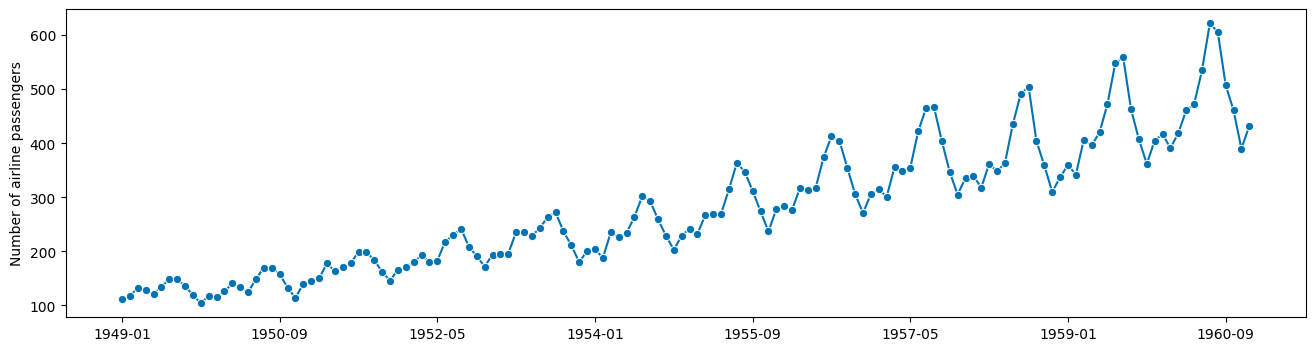

In [12]:
plot_series(y)

In [13]:
y_train, y_test = temporal_train_test_split(y,test_size=36)

sktimeのplot_seriesでは複数の系列データを異なる色で表示する機能もあります。

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

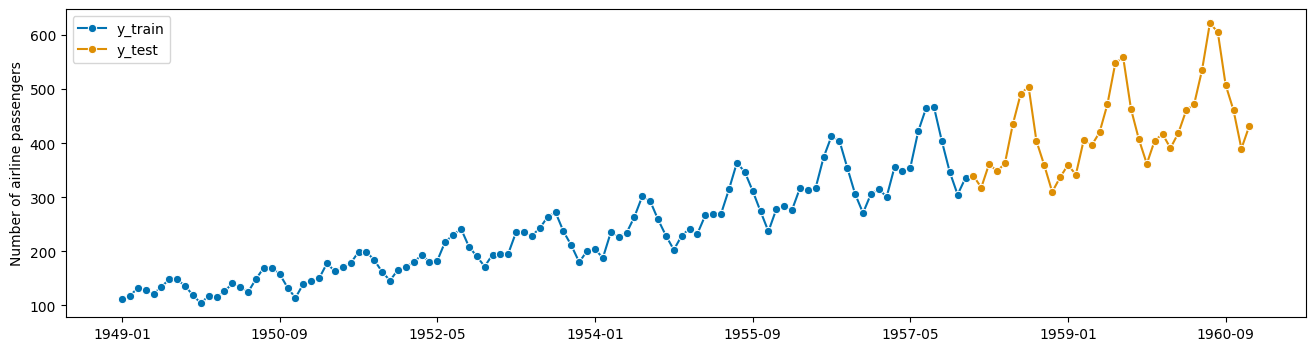

In [14]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])

周期を表すパラメータspを1年の月数である12にしてAutoARIMAのインスタンスを作成し、学習させます

In [15]:
forecaster = StatsForecastAutoARIMA(sp=12)
forecaster.fit(y_train)

StatsForecastAutoARIMA(sp=12)

テストデータと同じ系列長だけ予測をさせます。

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

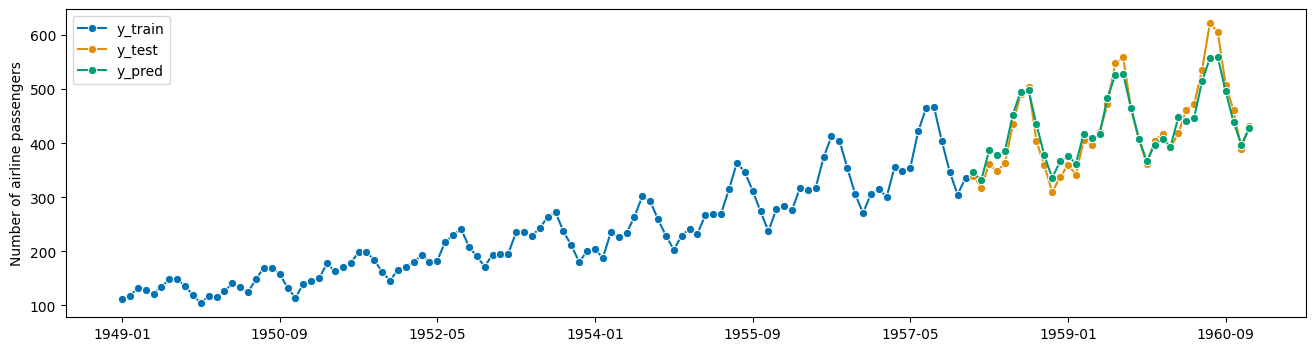

In [16]:
y_pred = forecaster.predict(list(range(1, len(y_test)+1)))
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

## 練習問題

Airline Passengers データに対して、季節性パラメータ（sp）の値を 6, 12, 24 と変化させて予測を行い、sktime.performance_metrics.forecasting.mean_absolute_error関数で評価を行ってください。

### 解答例

sp=6: MAE=54.67034787568299
sp=12: MAE=17.80778716195422


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:914: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(


sp=24: MAE=20.694444444444443


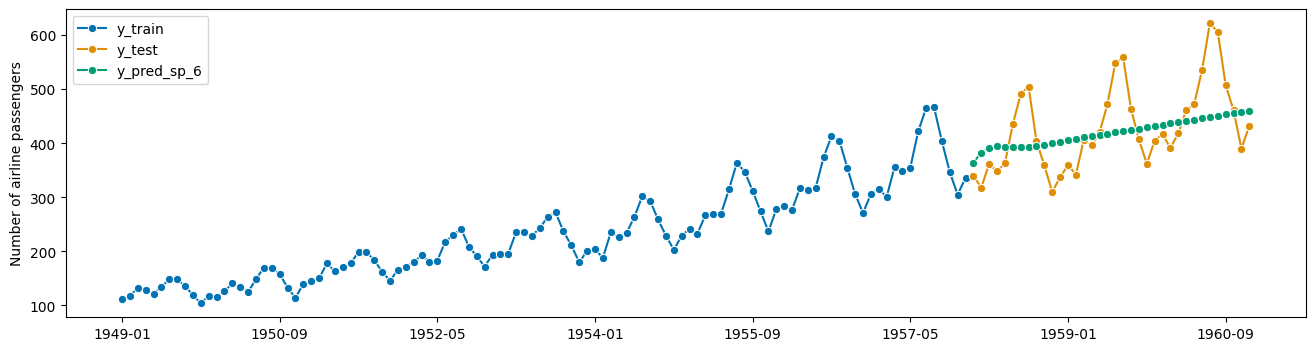

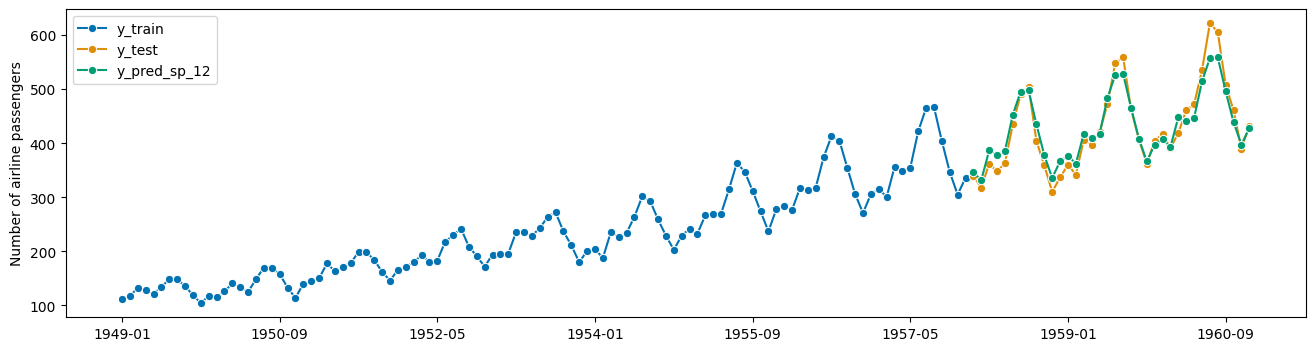

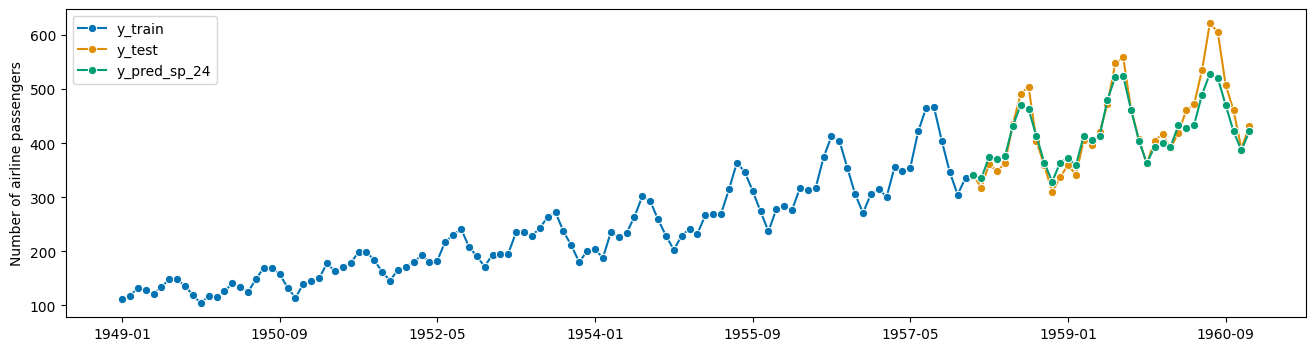

In [17]:
import numpy as np
import pandas as pd
import tqdm
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_error

# データのロード
y = load_airline()

# トレーニングデータとテストデータに分割
y_train, y_test = temporal_train_test_split(y, test_size=36)

# 季節性パラメータの異なる複数のAutoARIMAモデルを設定
sp_values = [6, 12, 24]  # 例として、いくつかの異なる季節性パラメータ値を試す
models = []
for sp in sp_values:
    models.append(StatsForecastAutoARIMA(sp=sp))

# 各モデルをトレーニングし、予測値を取得、そしてパフォーマンスを評価
for i, model in enumerate(models):
    model.fit(y_train)
    y_pred = model.predict(list(range(1, len(y_test)+1)))

    # 予測結果のプロット
    plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", f"y_pred_sp_{sp_values[i]}"])

    # モデルのパフォーマンスをMAEを使用して評価
    mae = mean_absolute_error(y_test, y_pred)
    print(f"sp={sp_values[i]}: MAE={mae}")